## Exercise 1: PCA on Face images

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os


def load_images(path: str, file_ending: str = ".png") -> np.ndarray:
    """
    Load all images in path with matplotlib that have given file_ending

    Arguments:
        path: Path of directory containing image files that can be assumed to have all the same dimensions
        file_ending: string that image files have to end with, if not->ignore file

    Return:
        images: A 3-D Numpy Array representing multiple images
                Dim 1 = Number of images
                Dim 2 = Height of images
                Dim 3 = Width of images
    """

    images = []

    files = os.listdir(path)
    files.sort()
    for cur in files:
        if not cur.endswith(file_ending):
            continue

        try:
            image = mpl.image.imread(path + cur)
            img_mtx = np.asarray(image, dtype="float64")
            images.append(img_mtx)
        except:
            continue

    return np.array(images)

print(f'---------- TRAIN ----------')
# Load images as 3-D Numpy Array.
images = load_images('./data/train/')
y, x = images.shape[1:3]
print(f'Loaded image matrix of shape {images.shape}')

# Flatten last two dimensions by reshaping the array
# PCA requires the input data to be in the form of a 2D matrix, 
# where each row represents an individual sample and each column represent a feature (pixel intensity values)
# PCA works by finding correlations between features (pixel values) to identify patterns in the data.
images = images.reshape(images.shape[0], x * y)
print(f'Image matrix shape after flattening {images.shape}')



---------- TRAIN ----------
Loaded image matrix of shape (150, 116, 98)
Image matrix shape after flattening (150, 11368)


In [3]:
# 1.1 Calculate mean values for each pixel across all images
# 1.2 Subtract mean values from images to center the data
mean_image=np.mean(images,axis=0)
centered_images = images - mean_image
# Calculate PCA
    # 2. Compute Eigenvectors of the image data
    #   and find the best linear mapping (eigenbasis)
    #   use the np.linalg.svd with the parameter 'full_matrices=False'
    #   pcs contains the singular vectors ~ eigen vectors

# U contains the left singular vectors. 150x150
# svals contains the singular values (magnitude of each component’s importance). (150,)
# pcs contains the principal components (right singular vectors). 150x11368
U, svals, pcs = np.linalg.svd(images, full_matrices=False)
print(f"U shape: {U.shape}, PCS shape: {pcs.shape}, SVALS shape: {svals.shape}, ",U.shape, pcs.shape, svals.shape)

U shape: (150, 150), PCS shape: (150, 11368), SVALS shape: (150,),  (150, 150) (150, 11368) (150,)


In [16]:
def pca_dimensionality(k):
    
    # 3. Use k=10/75/150 first (most important) Eigenvectors for image reconstruction
    # That means we only need the first k rows in the Vt matrix
    pca_ks=pcs[:k]
    
    # 4. Load, flatten and center the test images (as in 1.1 and 1.2)
    images_test = load_images('./data/test/')
    y, x = images_test.shape[1:3]
    images_test = images_test.reshape(images_test.shape[0], x * y)
    # Center test images using the training set mean
    images_test_normalized = images_test - mean_image
    # List for reconstructed images to plot it later
    reconstructed_images = []
    
    # 5. Loop through all normalized test images
    # to use the Eigenbasis to compress and then reconstruct our test images
    # and measure the reconstruction error between reconstructed and original image
    errors = []
    for i, test_image_normalized in enumerate(images_test_normalized):
        print(f'----- image[{i}] -----')
        
        # 5.1 Project test image onto the k-dimensional subspace
        # the result is a set of coefficients that are sufficient to reconstruct the image afterwards
    
        ## This step projects the normalized test image into the reduced k-dimensional subspace (defined by the top k principal components from PCA).
        ## The matrix pcs_k contains the top k principal components (columns), which are the most important eigenvectors.
        
        coeff_test_image = np.dot(pca_ks, test_image_normalized)
        print(f'Encoded / compact shape: {coeff_test_image.shape}')
        # 5.2 Reconstruct image from coefficient vector and add mean
        ## gives an approximation of the original image in the reduced k-dimensional space.
        reconstructed_image = np.dot(coeff_test_image, pca_ks) + mean_image
        print(f'Reconstructed shape: {reconstructed_image.shape}')
        reconstructed_image = reconstructed_image.reshape((y, x))
        reconstructed_images.append(reconstructed_image)
        # Measure error between loaded original image and reconstructed image
        test_image_original = images_test[i].reshape((y, x))  # Define the variable here
        ## eculidean norm between test image and reconstruct test image
        ## the lower the error thr better the construction
        error = np.linalg.norm(test_image_original - reconstructed_image)
        errors.append(error)
        print("reconstruction error: ", error)
    
    # Plot Results
    if len(images_test) != 0 and len(reconstructed_images) != 0:
        plot_img_original = images_test[-1].reshape((y, x))
        plot_img_reconstructed = reconstructed_images[-1]
    
        grid = plt.GridSpec(2, 9)
    
        plt.subplot(grid[0, 0:3])
        plt.imshow(plot_img_original, cmap='Greys_r')
        plt.xlabel('Original image')
    
        plt.subplot(grid[0, 3:6])
        plt.imshow(plot_img_reconstructed, cmap='Greys_r')
        plt.xlabel('Reconstructed image')
    
        plt.subplot(grid[0, 6:])
        plt.plot(np.arange(len(images_test)), errors)
        plt.xlabel('Errors all images')
    
        print("Mean error:", np.asarray(errors).mean())
        plt.savefig(f"pca_solution_{k}.png")
        plt.show()
    else:
        print('Make sure to fill image_test and reconstructed_images lists with images to show.')

----- image[0] -----
Encoded / compact shape: (10,)
Reconstructed shape: (11368,)
reconstruction error:  14.340334878721247
----- image[1] -----
Encoded / compact shape: (10,)
Reconstructed shape: (11368,)
reconstruction error:  19.192836325195373
----- image[2] -----
Encoded / compact shape: (10,)
Reconstructed shape: (11368,)
reconstruction error:  16.902733556619644
----- image[3] -----
Encoded / compact shape: (10,)
Reconstructed shape: (11368,)
reconstruction error:  15.650387651337802
----- image[4] -----
Encoded / compact shape: (10,)
Reconstructed shape: (11368,)
reconstruction error:  19.152647494148987
----- image[5] -----
Encoded / compact shape: (10,)
Reconstructed shape: (11368,)
reconstruction error:  17.761641115359815
----- image[6] -----
Encoded / compact shape: (10,)
Reconstructed shape: (11368,)
reconstruction error:  16.653073026219772
----- image[7] -----
Encoded / compact shape: (10,)
Reconstructed shape: (11368,)
reconstruction error:  17.16793834694127
----- ima

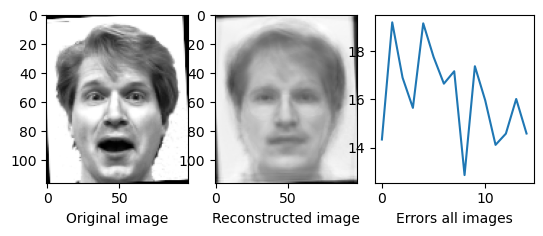

In [17]:
pca_dimensionality(10)

----- image[0] -----
Encoded / compact shape: (75,)
Reconstructed shape: (11368,)
reconstruction error:  6.443005592111785
----- image[1] -----
Encoded / compact shape: (75,)
Reconstructed shape: (11368,)
reconstruction error:  11.554726936242943
----- image[2] -----
Encoded / compact shape: (75,)
Reconstructed shape: (11368,)
reconstruction error:  11.849071470875199
----- image[3] -----
Encoded / compact shape: (75,)
Reconstructed shape: (11368,)
reconstruction error:  11.096775381635112
----- image[4] -----
Encoded / compact shape: (75,)
Reconstructed shape: (11368,)
reconstruction error:  13.657550568676392
----- image[5] -----
Encoded / compact shape: (75,)
Reconstructed shape: (11368,)
reconstruction error:  12.87140151194603
----- image[6] -----
Encoded / compact shape: (75,)
Reconstructed shape: (11368,)
reconstruction error:  10.58516974929733
----- image[7] -----
Encoded / compact shape: (75,)
Reconstructed shape: (11368,)
reconstruction error:  8.404393008445266
----- image[

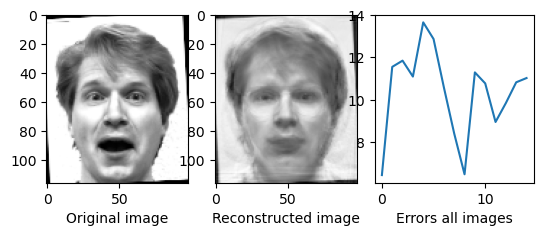

In [18]:
pca_dimensionality(75)

----- image[0] -----
Encoded / compact shape: (150,)
Reconstructed shape: (11368,)
reconstruction error:  3.412677585963454
----- image[1] -----
Encoded / compact shape: (150,)
Reconstructed shape: (11368,)
reconstruction error:  10.617376293244382
----- image[2] -----
Encoded / compact shape: (150,)
Reconstructed shape: (11368,)
reconstruction error:  10.689657210996707
----- image[3] -----
Encoded / compact shape: (150,)
Reconstructed shape: (11368,)
reconstruction error:  10.013395730333826
----- image[4] -----
Encoded / compact shape: (150,)
Reconstructed shape: (11368,)
reconstruction error:  12.685977483430523
----- image[5] -----
Encoded / compact shape: (150,)
Reconstructed shape: (11368,)
reconstruction error:  11.916949158223865
----- image[6] -----
Encoded / compact shape: (150,)
Reconstructed shape: (11368,)
reconstruction error:  9.653781265719793
----- image[7] -----
Encoded / compact shape: (150,)
Reconstructed shape: (11368,)
reconstruction error:  7.600282267809267
---

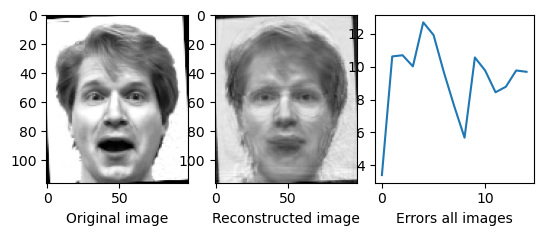

In [19]:
pca_dimensionality(150)

The mean reconstruction error of around 9.28 is a reasonable performance given that 150 components were used to represent the data. This error indicates that PCA is able to compress and reconstruct the face images with reasonable accuracy, but some amount of detail (and hence error) is inevitable because dimensionality reduction inherently discards less important information.

## Exercise 2: Linear Autoencoder 

In [23]:
import torch
from torch import nn
from torch.autograd import Variable

class Autoencoder(nn.Module):
    # n_pixels: The number of pixels in the image
    # feature_length: Vector length of the encoded image
    def __init__(self, n_pixels, feature_length):
        super(Autoencoder, self).__init__()
        # Define the Encoder layer (input: n_pixels, output: feature_length)
        self.encoder = nn.Linear(n_pixels, feature_length)
        # Define the Decoder layer (input: feature_length, output: n_pixels)
        self.decoder = nn.Linear(feature_length, n_pixels)
    def forward(self, x):
        # 1.3 Define forward path
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

def define_feature_length(feature_length):
    # Load images
    images = load_images('./data/train/')
    y, x = images.shape[1:3]
    # Flatten last two dimensions by reshaping the array
    images = images.reshape(images.shape[0], x * y)
    
    # 2.1 Calculate mean values for each pixel across all images
    # 2.2 Subtract mean values from images to center the data
    mean = images.mean(axis=0)
    images[:] -= mean
    
    # Set Hyperparameters 
    num_epochs = 250
    batch_size = 50
    learning_rate = 0.01
    
    data = torch.from_numpy(images)
    
    # Load Autoencoder model with number of pixels in our images
    model = Autoencoder(n_pixels=x * y, feature_length=feature_length)
    # Define Loss
    criterion = nn.MSELoss()
    # Define Optimizer
    optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate,weight_decay=1e-05)
    
    prev_loss = 10000.0
    best_model = None
    # Training loop
    for epoch in range(num_epochs):
        data = Variable(data.float())
        # Forward pass
        output = model(data)
        loss = criterion(output, data)
            
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        # Save the best model (lowest loss)
        if loss.item() < prev_loss:
            print(f'saved best model with loss: {loss.item()}')
            best_model = model
            prev_loss = loss.item()
    
            # Log the loss at each epoch
            print('epoch [{}/{}], loss:{:.4f}, MSE_loss:{:.4f}'.format(epoch + 1, num_epochs, loss.item(), loss.item()))
    
    # 3. Load, flatten and center the test images
    images_test = load_images('./data/test/')
    y, x = images_test.shape[1:3]
    images_test_normalized = images_test.reshape(images_test.shape[0], x * y) - mean
    data_test = torch.from_numpy(images_test_normalized)
    # List for reconstructed images to plot it later
    reconstructed_images = []
    
    # Loop through all normalized test images (data_test)
    # to encode and reconstruct the test images with our neural network autoencoder
    # and measure the reconstruction error between reconstructed and original image
    errors = []
    for i, test_image in enumerate(images_test):
        print(f'----- image[{i}] -----')
        # 4.1 Encode and reconstruct image with best nn model
        pred = best_model(data_test[i, :].float())
        pred_np = pred.data.numpy()
        print(f'Prediction shape: {pred_np.shape}')
            
        # 4.2 add mean to pred_np pred_np and reshape to size (116,98) to reconstruct the image
        # (Use the mean calculated from the training images)
        pred_np += mean
        img_reconst = pred_np.reshape((y, x))
        reconstructed_images.append(img_reconst)
        print(f'Reconstructed mage shape: {img_reconst.shape}')
        # Measure error between loaded original image and reconstructed image
        error = np.linalg.norm(test_image - img_reconst)
        errors.append(error)
        print(f'Reconstruction error: {error}')
    
    # Plot Results
    if len(images_test) != 0 and len(reconstructed_images) != 0:
        plot_img_original = images_test[-1]
        plot_img_reconstructed = reconstructed_images[-1]
    
        grid = plt.GridSpec(2, 9)
    
        plt.subplot(grid[0, 0:3])
        plt.imshow(plot_img_original, cmap='Greys_r')
        plt.xlabel('Original image')
    
        plt.subplot(grid[0, 3:6])
        plt.imshow(plot_img_reconstructed, cmap='Greys_r')
        plt.xlabel('Reconstructed image')
    
        plt.subplot(grid[0, 6:])
        plt.plot(np.arange(len(images_test)), errors)
        plt.xlabel('Errors all images')
    
        print("Mean error", np.asarray(errors).mean())
    
        plt.savefig(f"pca_ae_solution_{feature_length}.png")
        plt.show()
    else:
        print('Make sure to fill image_test and reconstructed_images lists with images to show.')

saved best model with loss: 0.10709873586893082
epoch [1/250], loss:0.1071, MSE_loss:0.1071
saved best model with loss: 0.1019604280591011
epoch [38/250], loss:0.1020, MSE_loss:0.1020
saved best model with loss: 0.09573017805814743
epoch [39/250], loss:0.0957, MSE_loss:0.0957
saved best model with loss: 0.0921856015920639
epoch [40/250], loss:0.0922, MSE_loss:0.0922
saved best model with loss: 0.09030891954898834
epoch [41/250], loss:0.0903, MSE_loss:0.0903
saved best model with loss: 0.08822552859783173
epoch [42/250], loss:0.0882, MSE_loss:0.0882
saved best model with loss: 0.08538462966680527
epoch [43/250], loss:0.0854, MSE_loss:0.0854
saved best model with loss: 0.082253098487854
epoch [44/250], loss:0.0823, MSE_loss:0.0823
saved best model with loss: 0.0795678049325943
epoch [45/250], loss:0.0796, MSE_loss:0.0796
saved best model with loss: 0.07802493125200272
epoch [46/250], loss:0.0780, MSE_loss:0.0780
saved best model with loss: 0.07756159454584122
epoch [47/250], loss:0.0776,

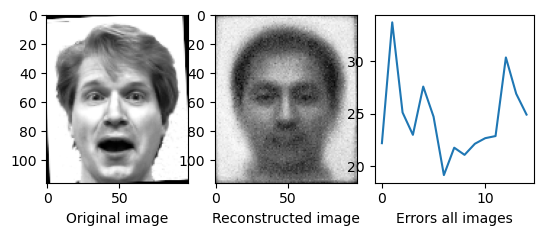

In [24]:
define_feature_length(10)

saved best model with loss: 0.07860644906759262
epoch [1/250], loss:0.0786, MSE_loss:0.0786
saved best model with loss: 0.07241233438253403
epoch [50/250], loss:0.0724, MSE_loss:0.0724
saved best model with loss: 0.07191305607557297
epoch [51/250], loss:0.0719, MSE_loss:0.0719
saved best model with loss: 0.05799649655818939
epoch [53/250], loss:0.0580, MSE_loss:0.0580
saved best model with loss: 0.05582621693611145
epoch [56/250], loss:0.0558, MSE_loss:0.0558
saved best model with loss: 0.05187210440635681
epoch [58/250], loss:0.0519, MSE_loss:0.0519
saved best model with loss: 0.0498715341091156
epoch [60/250], loss:0.0499, MSE_loss:0.0499
saved best model with loss: 0.043714139610528946
epoch [63/250], loss:0.0437, MSE_loss:0.0437
saved best model with loss: 0.04139699041843414
epoch [65/250], loss:0.0414, MSE_loss:0.0414
saved best model with loss: 0.041053690016269684
epoch [69/250], loss:0.0411, MSE_loss:0.0411
saved best model with loss: 0.038574472069740295
epoch [70/250], loss:

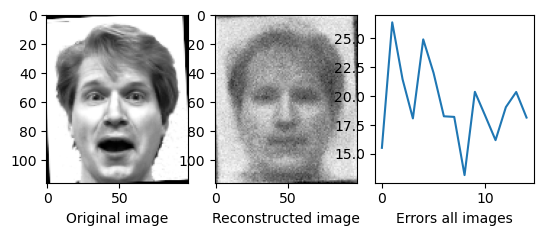

In [25]:
define_feature_length(75)

saved best model with loss: 0.07645925134420395
epoch [1/250], loss:0.0765, MSE_loss:0.0765
saved best model with loss: 0.07413765788078308
epoch [54/250], loss:0.0741, MSE_loss:0.0741
saved best model with loss: 0.06753432750701904
epoch [56/250], loss:0.0675, MSE_loss:0.0675
saved best model with loss: 0.05732732638716698
epoch [59/250], loss:0.0573, MSE_loss:0.0573
saved best model with loss: 0.0531560443341732
epoch [62/250], loss:0.0532, MSE_loss:0.0532
saved best model with loss: 0.05142996832728386
epoch [63/250], loss:0.0514, MSE_loss:0.0514
saved best model with loss: 0.04482382908463478
epoch [65/250], loss:0.0448, MSE_loss:0.0448
saved best model with loss: 0.04010751098394394
epoch [68/250], loss:0.0401, MSE_loss:0.0401
saved best model with loss: 0.039219487458467484
epoch [70/250], loss:0.0392, MSE_loss:0.0392
saved best model with loss: 0.03640840947628021
epoch [73/250], loss:0.0364, MSE_loss:0.0364
saved best model with loss: 0.03473860025405884
epoch [76/250], loss:0.

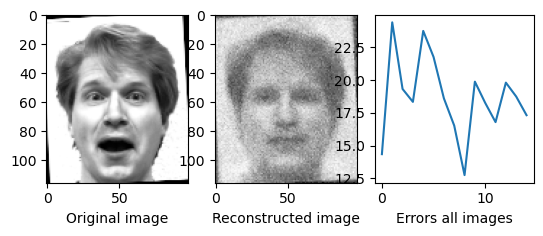

In [26]:
define_feature_length(150)